# Importing Libraries

In [2]:
import inspect
import pandas as pd
import numpy as np

from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

#import folium
import matplotlib.pyplot as plt
import seaborn as sns

# User Defined Functions (Helper Functions)

In [3]:
def get_dataframe_name(df):
    """
    Function to retrieve the name of the DataFrame variable passed as an argument.

    Args:
        df (pd.DataFrame): The DataFrame whose name is to be retrieved.

    Returns:
        str: The name of the DataFrame variable, or None if not found.
    """
    # Get the current frame and the caller's frame
    callers_local_vars = inspect.currentframe().f_back.f_locals
    # Search for the variable name in the caller's local variables
    for var_name, var_val in callers_local_vars.items():
        if var_val is df:
            return var_name
    return None  # Return None if the name is not found

# EDA

## Load SIM Incidents dataframes

In [4]:
# file names
fileNames = [
    #'/content/donneesouvertes-interventions-sim-2005-2014.csv',
    #'/content/donneesouvertes-interventions-sim_2015_2022.csv',
    #'/content/donneesouvertes-interventions-sim2020.csv',
    #'/content/donneesouvertes-interventions-sim.csv'
"C:\!!!PERSONAL_DATA\! Osama\! Data Science Courses\! 5-YCBS 299 - 47 Data Science Capstone Project\! Project\DATA\donneesouvertes-interventions-sim_2015_2022.csv",
"C:\!!!PERSONAL_DATA\! Osama\! Data Science Courses\! 5-YCBS 299 - 47 Data Science Capstone Project\! Project\DATA\donneesouvertes-interventions-sim-2005-2014.csv",
"C:\!!!PERSONAL_DATA\! Osama\! Data Science Courses\! 5-YCBS 299 - 47 Data Science Capstone Project\! Project\DATA\donneesouvertes-interventions-sim2020.csv",
"C:\!!!PERSONAL_DATA\! Osama\! Data Science Courses\! 5-YCBS 299 - 47 Data Science Capstone Project\! Project\DATA\donneesouvertes-interventions-sim.csv"    
]

# dataset for years 2005 up to 2014
df_sim_1_2005_14 = pd.read_csv(fileNames[0])

# dataset for years 2015 up to 2022
df_sim_2_2015_22 = pd.read_csv(fileNames[1])

# dataset for years 2020 up to 2023
df_sim_3_2020_23 = pd.read_csv(fileNames[2])
df_sim_3_2020_23['CREATION_DATE_TIME'] = pd.to_datetime(df_sim_3_2020_23['CREATION_DATE_TIME'], errors='coerce')

# Retaining only records from the year 2023 to prevent duplication,
# since df_sim_2_2015_22 and df_sim_3_2020_23 share overlapping years.
# dataset for year 2023
df_sim_3_2023_23 = df_sim_3_2020_23[df_sim_3_2020_23['CREATION_DATE_TIME'].dt.year == 2023]

# dataset for years 2024 & 2025(partially)
df_sim_4_2024_ = pd.read_csv(fileNames[3])

dataframes = [ df_sim_1_2005_14, df_sim_2_2015_22, df_sim_3_2023_23, df_sim_4_2024_ ]

## Initial Exploration: Understanding distributions and frequencies

In [5]:
for df in dataframes:
  df_name = get_dataframe_name(df)
  print("\n***********************************************")
  print("Details for ",df_name, "is as following")
  print("***********************************************")

  print("\tDataframe Shape : ", df.shape)

  print("\n\t*** --- The datatype and count of unique values in each column --- ***")
  for col in df.columns:
      print("\t\t",col, ", dtype: ", df[col].dtype, ", count of unique values: ", len(df[col].unique()))

  # print("\n\t*** ---  Info Summary of the dataset --- ***\n")
  # each_df.info()


***********************************************
Details for  df_sim_1_2005_14 is as following
***********************************************
	Dataframe Shape :  (894970, 13)

	*** --- The datatype and count of unique values in each column --- ***
		 INCIDENT_NBR , dtype:  int64 , count of unique values:  131754
		 CREATION_DATE_TIME , dtype:  object , count of unique values:  2922
		 INCIDENT_TYPE_DESC , dtype:  object , count of unique values:  174
		 DESCRIPTION_GROUPE , dtype:  object , count of unique values:  8
		 CASERNE , dtype:  int64 , count of unique values:  66
		 NOM_VILLE , dtype:  object , count of unique values:  17
		 NOM_ARROND , dtype:  object , count of unique values:  20
		 DIVISION , dtype:  int64 , count of unique values:  15
		 NOMBRE_UNITES , dtype:  float64 , count of unique values:  108
		 MTM8_X , dtype:  float64 , count of unique values:  49177
		 MTM8_Y , dtype:  float64 , count of unique values:  49769
		 LONGITUDE , dtype:  float64 , count of unique val

## Understanding distributions and frequencies

In [6]:
for df in dataframes:
  df_name = get_dataframe_name(df)
  print("\n***********************************************")
  print("Details for ",df_name, "is as following")
  print("***********************************************")

  print("\n--- Distribution and Frequency (Top 5 values for Object/Categorical Columns) ---")
  # Iterate through each column to analyze its distribution
  for column in df.columns:
      # Check if the column is categorical or an object (e.g., strings)
      if df[column].dtype in ['object', 'category']:
          print(f"\nValue Counts for **{column}**:")
          # Display the top 5 most frequent values for categorical data
          print(df[column].value_counts().head())

      # Check if the column is numerical (integer or float)
      elif df[column].dtype in ['int64', 'float64']:
          print(f"\nDistribution Stats for **{column}**:")
          # Display key distribution measures (mean, median, quartiles)
          print(df[column].describe())

          # You can also check for unique values or specific frequency
          if len(df[column].unique()) < 20: # Example threshold for many unique values
              print("Value Counts (All Unique Values):")
              print(df[column].value_counts())
          else:
              print(f"Number of unique values: {df[column].nunique()}")

      print("--- Count of Null Values in the column is", df[column].isnull().sum())


***********************************************
Details for  df_sim_1_2005_14 is as following
***********************************************

--- Distribution and Frequency (Top 5 values for Object/Categorical Columns) ---

Distribution Stats for **INCIDENT_NBR**:
count    894970.000000
mean      60802.997554
std       36205.719491
min           1.000000
25%       29890.000000
50%       59940.000000
75%       90222.000000
max      500127.000000
Name: INCIDENT_NBR, dtype: float64
Number of unique values: 131754
--- Count of Null Values in the column is 0

Value Counts for **CREATION_DATE_TIME**:
CREATION_DATE_TIME
2019/11/01    987
2015/01/04    708
2016/02/15    602
2022/06/16    593
2016/06/20    562
Name: count, dtype: int64
--- Count of Null Values in the column is 0

Value Counts for **INCIDENT_TYPE_DESC**:
INCIDENT_TYPE_DESC
Premier répondant            545324
Appel de Cie de détection     61402
Alarme privé ou locale        40422
Ac.véh./1R/s.v./ext/29B/D     32018
Aliments sur

In [7]:
for df in dataframes:
  df_name = get_dataframe_name(df)
  print("\n***********************************************")
  print("Info for ",df_name, "is as following")
  print("***********************************************")
  df.info()


***********************************************
Info for  df_sim_1_2005_14 is as following
***********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894970 entries, 0 to 894969
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INCIDENT_NBR        894970 non-null  int64  
 1   CREATION_DATE_TIME  894970 non-null  object 
 2   INCIDENT_TYPE_DESC  894970 non-null  object 
 3   DESCRIPTION_GROUPE  894848 non-null  object 
 4   CASERNE             894970 non-null  int64  
 5   NOM_VILLE           894970 non-null  object 
 6   NOM_ARROND          894970 non-null  object 
 7   DIVISION            894970 non-null  int64  
 8   NOMBRE_UNITES       894705 non-null  float64
 9   MTM8_X              894970 non-null  float64
 10  MTM8_Y              894970 non-null  float64
 11  LONGITUDE           894970 non-null  float64
 12  LATITUDE            894970 non-null  float64

### Formatting the datatime

In [8]:
# The line of code below gives error when run because of the data-issue for three records in dataframes[3]
#dataframes[3][(dataframes[3]['INCIDENT_NBR']==70406) & (dataframes[3]['CREATION_DATE_TIME'].dt.year==2024)]

In [9]:
# Creating new column CREATION_DATE_FIXED for the fix of the column
for df in dataframes:
    df["CREATION_DATE_FIXED"] = pd.to_datetime(
        df["CREATION_DATE_TIME"], 
        errors="coerce",   # turn unparseable values into NaT
        format="mixed"     # allows both date-only and datetime strings
    ).dt.normalize()

C:\Users\osadl\AppData\Local\Temp\ipykernel_27808\2295438161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CREATION_DATE_FIXED"] = pd.to_datetime(


## Concatenate the four datasets to generate our final combined dataset for year 2005 up to 2025

In [10]:
sim_combined_df = pd.concat([dataframes[0], dataframes[1], dataframes[2], dataframes[3]], ignore_index=True)
print(sim_combined_df.shape)

(2141072, 14)


In [11]:
# below line is to ensure there are no numm values remaining after converting/reformatting the CREATION_DATE_FIXED new column 
# which has the date issue fixed  
#print(sim_combined_df[sim_combined_df['CREATION_DATE_FIXED'].isna()])
sim_combined_df['CREATION_DATE_FIXED'].isna().sum()

0

In [12]:
incidents_by_description_groupe = sim_combined_df.groupby('DESCRIPTION_GROUPE').size().reset_index(name='IncidentCount')

display(incidents_by_description_groupe)

,DESCRIPTION_GROUPE,IncidentCount
0,1-REPOND,797372
1,AUTREFEU,30848
2,Alarmes-incendies,299064
3,Autres incendies,38389
4,FAU-ALER,878
5,Fausses alertes/annulations,4680
6,INCENDIE,13077
7,Incendies de bâtiments,14593
8,NOUVEAU,8
9,Premier répondant,488429


## Creating a new column NOM_ARROND_2 as per the logic below
1- in case NOM_ARROND = Indéterminé => use the same the value from the NOM_VILLE column in the new column NOM_ARROND_2 

2- in any other case => just use the same the value from the NOM_ARROND column

In [13]:
sim_combined_df["NOM_ARROND_2"] = sim_combined_df["NOM_ARROND"].where(sim_combined_df["NOM_ARROND"] != "Indéterminé", sim_combined_df["NOM_VILLE"])
#create another field NOM_ARROND_2: replace Indetermine by NOM_VILLE

## Data Cleansing for NOM_ARROND

In [14]:
unique_value_NOM_ARROND_2 = sorted(sim_combined_df["NOM_ARROND_2"].unique().tolist())
for val in unique_value_NOM_ARROND_2:
    print(val)

Ahuntsic / Cartierville
Ahuntsic-Cartierville
Anjou
Baie d'Urfé
Baie-d'Urfé
Beaconsfield
Beaconsfield / Baie d'Urfé
Côte St-Luc
Côte St-Luc / Hampstead / Mtl-Ouest
Côte-Saint-Luc
Côte-des-Neiges / Notre-Dame-de-Grâce
Côte-des-Neiges-Notre-Dame-de-Grâce
Dollard-des-Ormeaux
Dollard-des-Ormeaux / Roxboro
Dorval
Dorval / Ile Dorval
Hampstead
Ile Dorval
Ile-Bizard / Ste-Geneviève / Ste-A-de-B
Indéterminé
Kirkland
L'Ile-Bizard / Ste-Geneviève
L'Île-Bizard-Sainte-Geneviève
L'Île-Dorval
LaSalle
Lachine
Lasalle
Le Plateau-Mont-Royal
Le Sud-Ouest
Mercier / Hochelaga-Maisonneuve
Mercier-Hochelaga-Maisonneuve
Mont-Royal
Montréal-Est
Montréal-Nord
Montréal-Ouest
Outremont
Pierrefonds / Roxboro
Pierrefonds / Senneville
Pierrefonds-Roxboro
Plateau Mont-Royal
Pointe-Claire
Rivière-des-Prairies / P-A-T/Mtl-Est
Rivière-des-Prairies / Pointe-aux-Trembles
Rivière-des-Prairies-Pointe-aux-Trembles
Rosemont / Petite-Patrie
Rosemont-La Petite-Patrie
Saint-Laurent
Saint-Léonard
Sainte-Anne-de-Bellevue
Sennevil

# Visualization

In [15]:
filtered_df = sim_combined_df[sim_combined_df['DESCRIPTION_GROUPE'].isin(['Alarmes-incendies', 'AUTREFEU', 'INCENDIE', 'Incendies de bâtiments', 'Autres incendies'])]

display(filtered_df.head())

sim_combined_df = filtered_df

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,CREATION_DATE_FIXED,NOM_ARROND_2
8,20074,2018/02/22,Alarme privé ou locale,Alarmes-incendies,20,Montréal,Ville-Marie,6,4.0,300599.1,5041118.2,-73.553764,45.509971,2018-02-22,Ville-Marie
19,45534,2018/05/10,Déchets en feu,AUTREFEU,55,Pointe-Claire,Indéterminé,2,1.0,281760.2,5035568.6,-73.794604,45.459666,2018-05-10,Pointe-Claire
26,53654,2018/06/02,Appel de Cie de détection,Alarmes-incendies,5,Montréal,Ville-Marie,6,3.0,299523.5,5040741.7,-73.567526,45.506577,2018-06-02,Ville-Marie
27,54060,2018/06/03,Alarme privé ou locale,Alarmes-incendies,19,Montréal,Ville-Marie,6,3.0,300950.6,5042619.3,-73.549277,45.523481,2018-06-03,Ville-Marie
31,60405,2018/06/20,Appel de Cie de détection,Alarmes-incendies,76,Westmount,Indéterminé,14,3.0,297496.4,5039104.8,-73.593442,45.491828,2018-06-20,Westmount


### Incident Count by Date

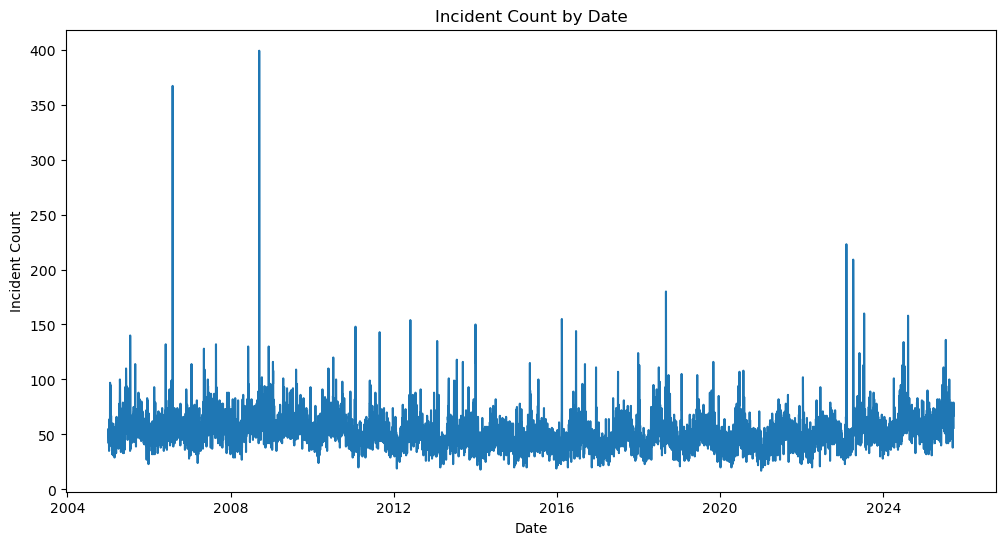

In [16]:
incidents_by_date = sim_combined_df.groupby('CREATION_DATE_FIXED').size().reset_index(name='IncidentCount')

plt.figure(figsize=(12, 6))
plt.plot(incidents_by_date['CREATION_DATE_FIXED'], incidents_by_date['IncidentCount'])
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.title('Incident Count by Date')
plt.show()

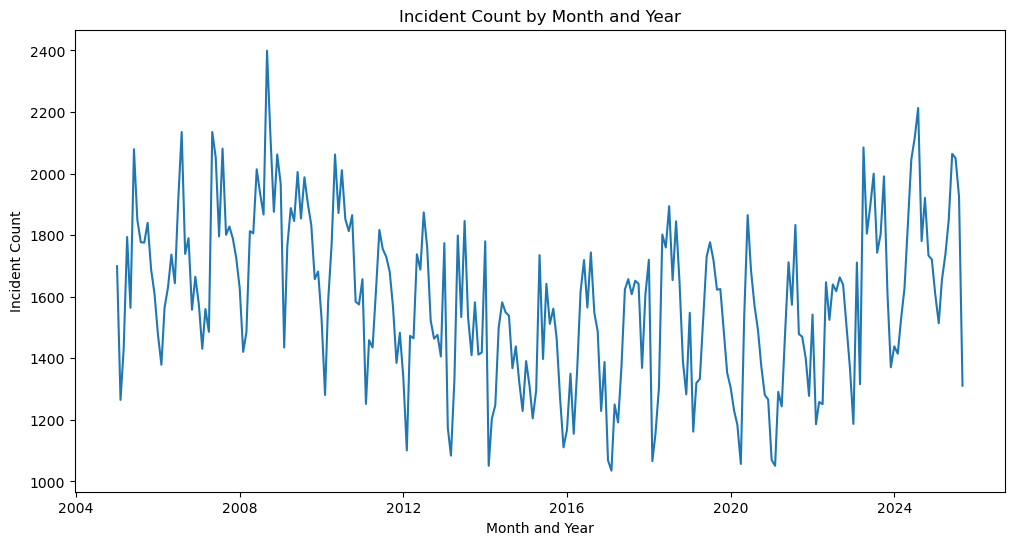

In [17]:
import matplotlib.pyplot as plt

sim_combined_df['CREATION_DATE_FIXED'] = pd.to_datetime(sim_combined_df['CREATION_DATE_FIXED'])

sim_combined_df['YearMonth'] = sim_combined_df['CREATION_DATE_FIXED'].dt.to_period('M')

incidents_by_month_year = sim_combined_df.groupby('YearMonth').size().reset_index(name='IncidentCount')

incidents_by_month_year['YearMonth'] = incidents_by_month_year['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(incidents_by_month_year['YearMonth'], incidents_by_month_year['IncidentCount'])
plt.xlabel('Month and Year')
plt.ylabel('Incident Count')
plt.title('Incident Count by Month and Year')
plt.show()

Based on the charts we generated showing the incident count by month for each year (2020-2025) and the yearly average trend, you can observe seasonality by looking for recurring patterns in the monthly counts. For example, if there's a consistent peak in incidents during certain months each year, that would suggest seasonality.

The chart with multiple lines (one for each year and one for the average trend) is particularly useful for this. Look for months where most lines show a similar increase or decrease in incident counts.

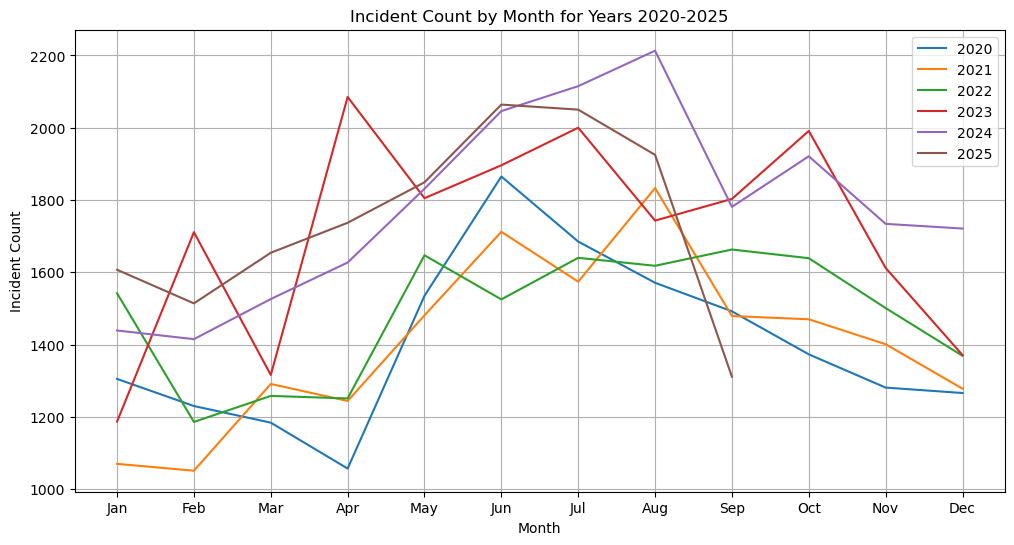

In [18]:
sim_combined_df['CREATION_DATE_FIXED'] = pd.to_datetime(sim_combined_df['CREATION_DATE_FIXED'])
sim_combined_df['Month'] = sim_combined_df['CREATION_DATE_FIXED'].dt.month
sim_combined_df['Year'] = sim_combined_df['CREATION_DATE_FIXED'].dt.year

plt.figure(figsize=(12, 6))

for year in range(2020, 2026):
    df_year = sim_combined_df[sim_combined_df['Year'] == year]
    incidents_by_month = df_year.groupby('Month').size().reset_index(name='IncidentCount')
    plt.plot(incidents_by_month['Month'], incidents_by_month['IncidentCount'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('Incident Count by Month for Years 2020-2025')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

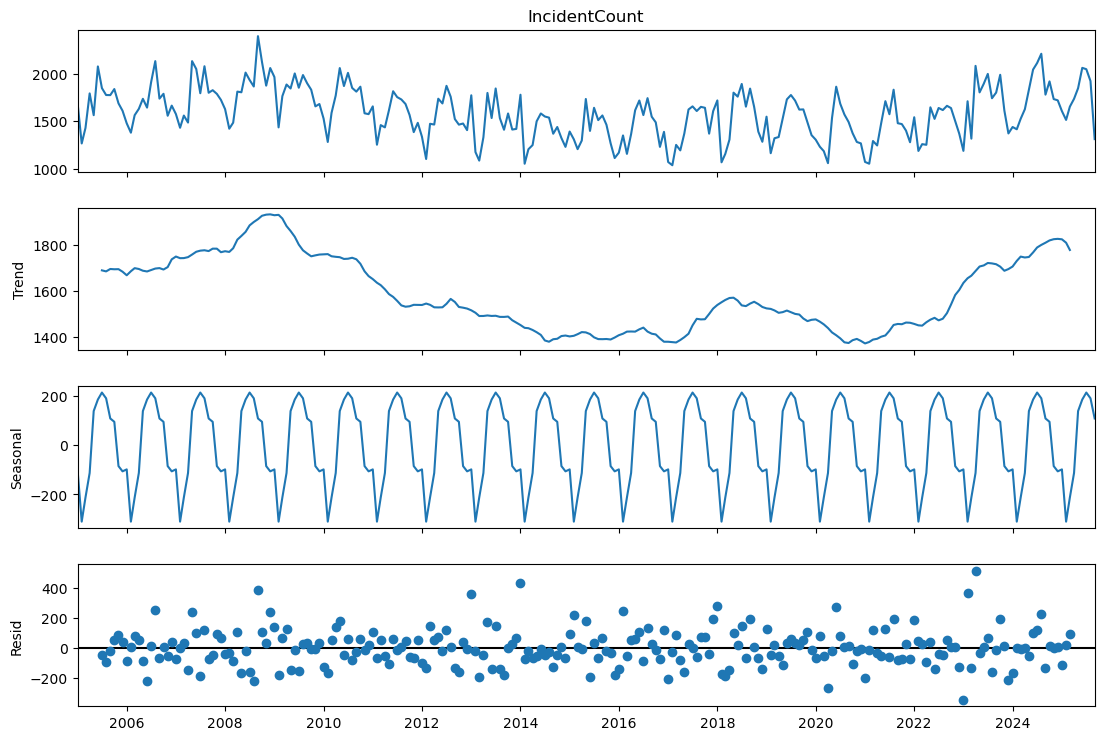

In [19]:
# Aggregate the data by month
incidents_by_month_year = sim_combined_df.groupby(sim_combined_df['CREATION_DATE_FIXED'].dt.to_period('M')).size().to_frame(name='IncidentCount')
incidents_by_month_year.index = incidents_by_month_year.index.to_timestamp()

# Perform seasonal decomposition
decomposition = seasonal_decompose(incidents_by_month_year['IncidentCount'], model='additive')

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [20]:
missing_time_mask = sim_combined_df['CREATION_DATE_FIXED'].isnull()
df_with_missing_time = sim_combined_df[missing_time_mask]

if not df_with_missing_time.empty:
    print("Rows with 'CREATION_DATE_TIME' equal to 'NaT':")
    display(df_with_missing_time.head())
else:
    print("No rows with 'CREATION_DATE_TIME' equal to 'NaT' found.")

No rows with 'CREATION_DATE_TIME' equal to 'NaT' found.


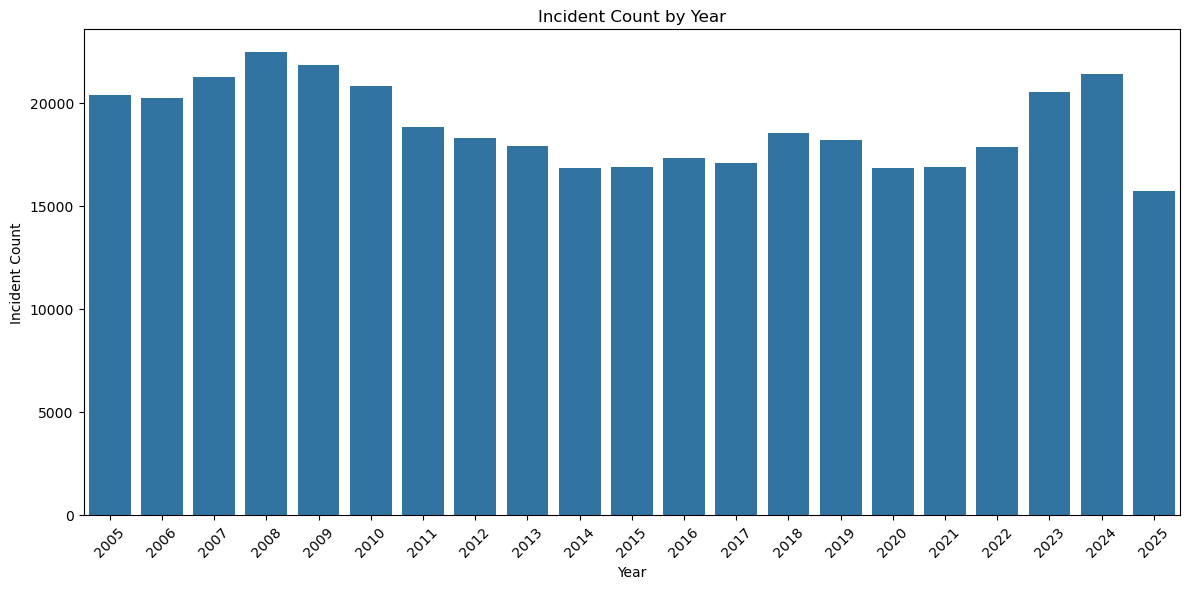

In [21]:
sim_combined_df['Year'] = sim_combined_df['CREATION_DATE_FIXED'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=sim_combined_df)
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Incident Count by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

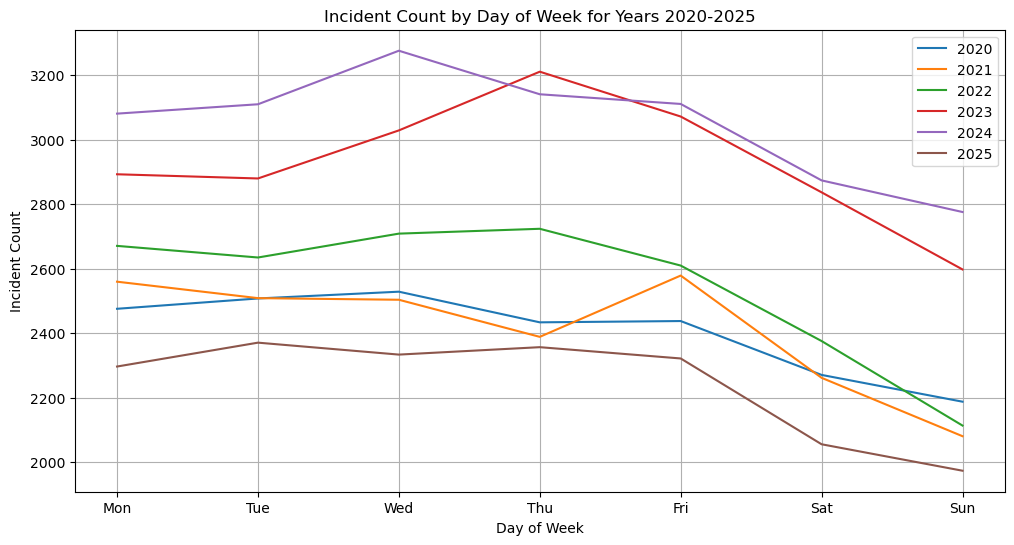

In [22]:
sim_combined_df['CREATION_DATE_FIXED'] = pd.to_datetime(sim_combined_df['CREATION_DATE_FIXED'])
sim_combined_df['DayOfWeek'] = sim_combined_df['CREATION_DATE_FIXED'].dt.dayofweek # Monday=0, Sunday=6
sim_combined_df['Year'] = sim_combined_df['CREATION_DATE_FIXED'].dt.year

plt.figure(figsize=(12, 6))

for year in range(2020, 2026):
    df_year = sim_combined_df[sim_combined_df['Year'] == year]
    incidents_by_dayofweek = df_year.groupby('DayOfWeek').size().reset_index(name='IncidentCount')
    plt.plot(incidents_by_dayofweek['DayOfWeek'], incidents_by_dayofweek['IncidentCount'], label=str(year))

plt.xlabel('Day of Week')
plt.ylabel('Incident Count')
plt.title('Incident Count by Day of Week for Years 2020-2025')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.show()

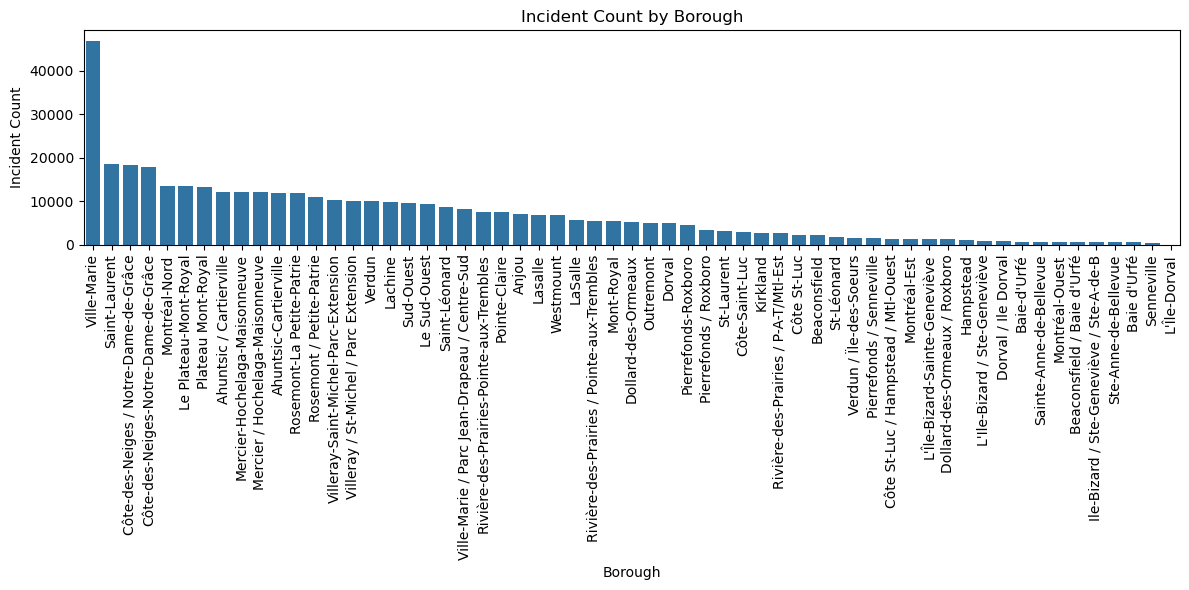

"\n# Plot by Nom_Ville\nincidents_by_ville = sim_combined_df['NOM_ARROND_2'].value_counts().reset_index(name='IncidentCount')\nincidents_by_ville.columns = ['NOM_ARROND_2', 'IncidentCount']\n\nplt.figure(figsize=(12, 6))\nsns.barplot(x='NOM_ARROND_2', y='IncidentCount', data=incidents_by_ville)\nplt.xlabel('City')\nplt.ylabel('Incident Count')\nplt.title('Incident Count by City')\nplt.xticks(rotation=90)\nplt.tight_layout()\nplt.show()\n"

In [23]:
# Plot by Nom_Arrond_2
incidents_by_arrondissement = sim_combined_df['NOM_ARROND_2'].value_counts().reset_index(name='IncidentCount')
incidents_by_arrondissement.columns = ['NOM_ARROND_2', 'IncidentCount']

plt.figure(figsize=(12, 6))
sns.barplot(x='NOM_ARROND_2', y='IncidentCount', data=incidents_by_arrondissement)
plt.xlabel('Borough')
plt.ylabel('Incident Count')
plt.title('Incident Count by Borough')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

'''
# Plot by Nom_Ville
incidents_by_ville = sim_combined_df['NOM_ARROND_2'].value_counts().reset_index(name='IncidentCount')
incidents_by_ville.columns = ['NOM_ARROND_2', 'IncidentCount']

plt.figure(figsize=(12, 6))
sns.barplot(x='NOM_ARROND_2', y='IncidentCount', data=incidents_by_ville)
plt.xlabel('City')
plt.ylabel('Incident Count')
plt.title('Incident Count by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
'''

In [24]:

total_incident_count = len(sim_combined_df)
print(f"Total incident count: {total_incident_count}")

Total incident count: 395971


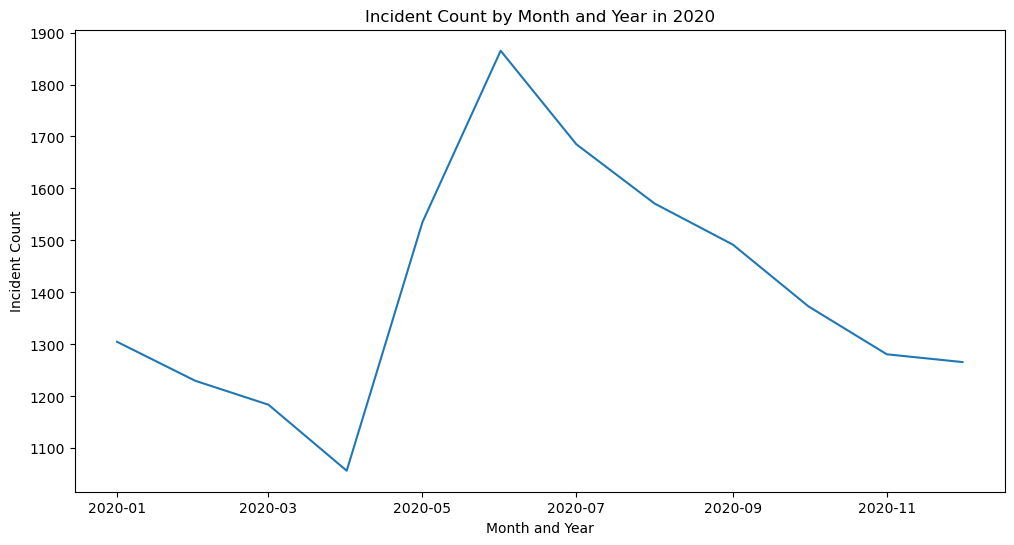

In [25]:
sim_combined_df['CREATION_DATE_FIXED"'] = pd.to_datetime(sim_combined_df['CREATION_DATE_FIXED'])

sim_combined_df['YearMonth'] = sim_combined_df['CREATION_DATE_FIXED'].dt.to_period('M')

df_2020 = sim_combined_df[sim_combined_df['CREATION_DATE_FIXED'].dt.year == 2020]

incidents_by_month_year_2020 = df_2020.groupby('YearMonth').size().reset_index(name='IncidentCount')

incidents_by_month_year_2020['YearMonth'] = incidents_by_month_year_2020['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(incidents_by_month_year_2020['YearMonth'], incidents_by_month_year_2020['IncidentCount'])
plt.xlabel('Month and Year')
plt.ylabel('Incident Count')
plt.title('Incident Count by Month and Year in 2020')
plt.show()

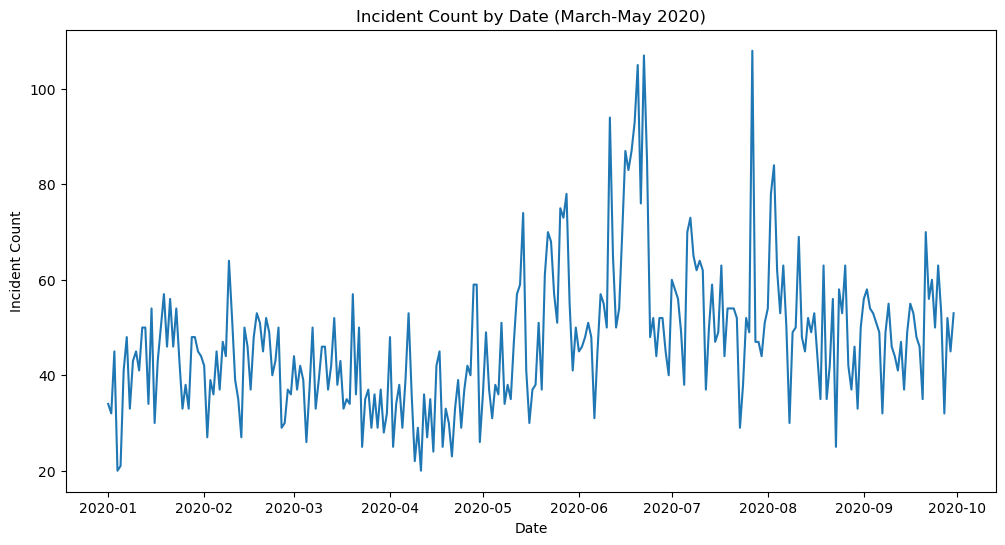

In [26]:
df_2020_march_july = sim_combined_df[(sim_combined_df['CREATION_DATE_FIXED'].dt.year == 2020) &
                                (sim_combined_df['CREATION_DATE_FIXED'].dt.month >= 1) &
                                (sim_combined_df['CREATION_DATE_FIXED'].dt.month <= 9)]

incidents_by_date_2020_march_july = df_2020_march_july.groupby('CREATION_DATE_FIXED').size().reset_index(name='IncidentCount')

plt.figure(figsize=(12, 6))
plt.plot(incidents_by_date_2020_march_july['CREATION_DATE_FIXED'], incidents_by_date_2020_march_july['IncidentCount'])
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.title('Incident Count by Date (March-May 2020)')
plt.show()

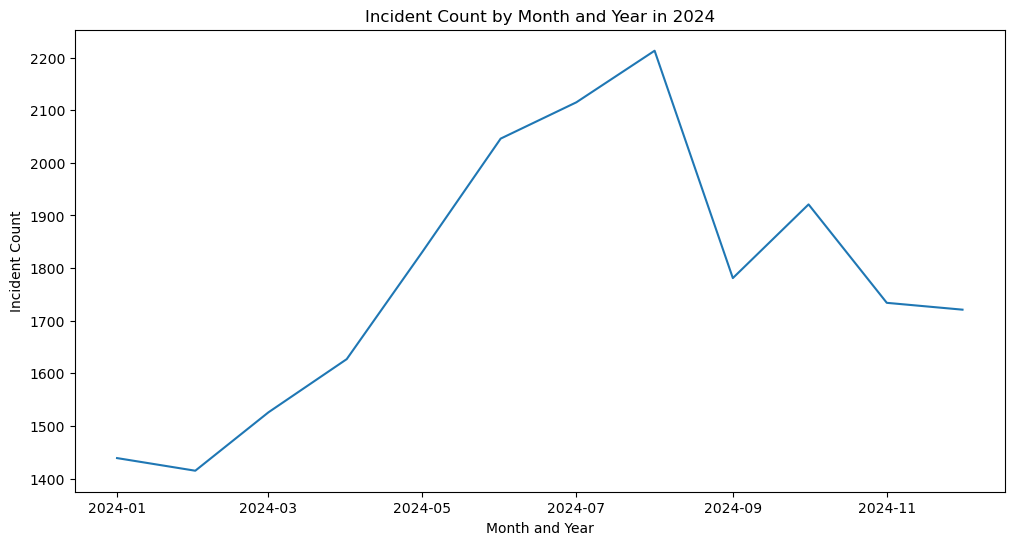

In [27]:
df_2024 = sim_combined_df[sim_combined_df['CREATION_DATE_FIXED'].dt.year == 2024]

incidents_by_month_year_2024 = df_2024.groupby('YearMonth').size().reset_index(name='IncidentCount')

incidents_by_month_year_2024['YearMonth'] = incidents_by_month_year_2024['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(incidents_by_month_year_2024['YearMonth'], incidents_by_month_year_2024['IncidentCount'])
plt.xlabel('Month and Year')
plt.ylabel('Incident Count')
plt.title('Incident Count by Month and Year in 2024')
plt.show()

In [28]:
incidents_by_arrondissement = sim_combined_df.groupby('NOM_ARROND_2').size().reset_index(name='IncidentCount')

display(incidents_by_arrondissement.head(50))

,NOM_ARROND_2,IncidentCount
0,Ahuntsic / Cartierville,12198
1,Ahuntsic-Cartierville,11907
2,Anjou,7137
3,Baie d'Urfé,507
4,Baie-d'Urfé,653
5,Beaconsfield,2140
6,Beaconsfield / Baie d'Urfé,602
7,Côte St-Luc,2218
8,Côte St-Luc / Hampstead / Mtl-Ouest,1297
9,Côte-Saint-Luc,2836
